# Brennan etal 2019 - Figure 3

Katie Brennan  
November 2019  
  
Figure shows the reconstruction of Arctic sea ice exten with satellite and walsh et al 2017 data. 

Figure 3 shows the LMR reconstruction compared with the Walsh etal 2017 and satellite (Fetterer et al 2017) data for total Arctic sea ice extent with the slope of the decline in the satellite and Early 20th Century Warming periods. 

In [1]:
import numpy as np 
import pickle
import matplotlib.pyplot as plt
# import scipy.signal as spy
# import scipy.stats as stats
# import LMR_lite_utils as LMRlite
# import LMR_config_greg
import sys,os
plt.rcParams['figure.dpi']=150

In [2]:
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_utils_kb/')
import Sice_utils as si_utils

sys.path.insert(2,'/home/disk/kalman2/mkb22/pyLMR/')
import LMR_utils 

sys.path.insert(3,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import reanalysis_recons_utils as rrutils

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [3]:
import importlib
# #importlib.reload(LMRlite)
# #importlib.reload(LMR_config)
# importlib.reload(LMRlite)
importlib.reload(rrutils)

<module 'reanalysis_recons_utils' from '/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/reanalysis_recons_utils.py'>

In [4]:
anom_start = 1979
anom_end = 2013

# NH surface area in M km^2 from concentration in percentage
nharea = 2*np.pi*(6380**2)/1e8

## Load Walsh and satellite data:

In [5]:
# LOAD ANNUAL SATELLITE DATA: 
[fet_sia_anom, fet_sie_anom, fet_time] = rrutils.load_annual_satellite_anom(anom_end)
[fet_sia, fet_sie, fet_time2] = rrutils.load_annual_satellite()

In [6]:
# LOAD ANNUAL WALSH DATA: 
[walsh_sia, walsh_sie, walsh_time] = rrutils.load_annual_walsh()

walsh_sia_anom = rrutils.find_anomalies(walsh_time, walsh_sia, anom_start,anom_end)
walsh_sie_anom = rrutils.find_anomalies(walsh_time, walsh_sie, anom_start,anom_end)

## Load reconstructions: 

In [7]:
path = ('/home/disk/p/mkb22/nobackup/LMR_output/reanalysis_reconstruction_data/'+
        'annual/Brennan_etal_2019/full_reconstructions/mpi/')

chosen_dset = ['CRU']

inf_name = ['1_8']
loc = [15000]
iteration = ['a','b','c','d','e']

name = {}
name_dict = {}
tot=0
           
# for ninf in range(len(inf_name)):
#     for nloc in range(len(loc)):
for it in iteration:
    name[tot] = ('sic_mpi_annual_recon_1850_2018_cru_gis_be_R0_4_10deg_inf'+
               inf_name[0]+'_loc'+str(loc[0])+it+'.pkl')

    name_dict[tot] = ('MPI R0.4 inf'+inf_name[0]+' loc'+str(loc[0])+' '+it)
    tot = tot+1

In [8]:
sia_anom={}
sia_97_5={}
sia_2_5={}
sie_anom={}
sie_97_5={}
sie_2_5={}
recon_years_all={}
sie_full_ens = {}

for i in range(len(name_dict)):
    [sia_anom[name_dict[i]], 
     sia_97_5[name_dict[i]], 
     sia_2_5[name_dict[i]], 
     sie_anom[name_dict[i]], 
     sie_97_5[name_dict[i]], 
     sie_2_5[name_dict[i]], 
     recon_years_all[name_dict[i]],
     sie_full_ens[name_dict[i]]] = rrutils.load_recon_sie_95(path+name[i],chosen_dset,
                                                             anom_start,anom_end,full=True)

In [9]:
sie_allit_fullens = sie_full_ens[name_dict[0]]['CRU']

for i in range(len(iteration)):
    if i is 0: 
        sie_allit_fullens = sie_full_ens[name_dict[0]]['CRU']
    else:
        sie_allit_fullens = np.concatenate((sie_allit_fullens,
                                            sie_full_ens[name_dict[i]]['CRU']),axis=1)

sie_allit_fullens_anom = np.zeros(sie_allit_fullens.shape)
for i in range(sie_allit_fullens.shape[1]):
    sie_allit_fullens_anom[:,i] = rrutils.find_anomalies(np.array(recon_years_all[name_dict[0]]['CRU']),
                                                         sie_allit_fullens[:,i],anom_start,anom_end)

In [10]:
#plt.plot(sie_allit_fullens_anom);

### Calculate mean and spread across all iterations: 

In [11]:
sie_97_5_full_anom = np.percentile(sie_allit_fullens_anom,97.5,axis=1)
sie_2_5_full_anom = np.percentile(sie_allit_fullens_anom,2.5,axis=1)

sie_full_mean_anom = np.nanmean(sie_allit_fullens_anom,axis=1)

## Calculate statistics: 

In [12]:
stat_start = 1979
stat_end=2017

ce_cru_sie = {}
corr_cru_sie = {}
var_cru_sie = {}

ce_cru_sie_dt = {}
corr_cru_sie_dt = {}
var_cru_sie_dt = {}

slope_cru_sie = {}

slope_cru_sie_sat = []
slope_cru_sie_etcw = []

allit = 'mean all iterations'

[ce_cru_sie[allit], 
 corr_cru_sie[allit],
 var_cru_sie['sat'], 
 var_cru_sie[allit]] = rrutils.find_ce_corr(sie_full_mean_anom, 
                                           fet_sie_anom,
                                           fet_time,
                                           np.array(recon_years_all[name_dict[0]]['CRU']),
                                           stat_start,stat_end)

[ce_cru_sie_dt[allit], 
 corr_cru_sie_dt[allit],
 var_cru_sie_dt['sat'], 
 var_cru_sie_dt[allit]] = rrutils.find_ce_corr(sie_full_mean_anom, 
                                                fet_sie_anom,
                                               fet_time,
                                               np.array(recon_years_all[name_dict[0]]['CRU']),
                                               stat_start,stat_end,detrend=True)

for i in range(sie_allit_fullens_anom.shape[1]):
    slope_cru_sie_oneit = rrutils.find_trend(sie_allit_fullens_anom[:,i],
                                             np.array(recon_years_all[name_dict[0]]['CRU']),
                                             stat_start,stat_end)

    slope_cru_sie_oneit_etcw = rrutils.find_trend(sie_allit_fullens_anom[:,i],
                                                  np.array(recon_years_all[name_dict[0]]['CRU']),
                                                  1912,1937)

    slope_cru_sie_sat = np.append(slope_cru_sie_sat,slope_cru_sie_oneit)
    slope_cru_sie_etcw = np.append(slope_cru_sie_etcw,slope_cru_sie_oneit_etcw)
        
slope_cru_sie[allit] = slope_cru_sie_sat
slope_cru_sie['etcw all iterations'] = slope_cru_sie_etcw

sat_slope = rrutils.find_trend(fet_sie, fet_time, anom_start,2017)
walsh_etcw_slope = rrutils.find_trend(walsh_sie_anom, walsh_time, 1912,1937)

In [13]:
slope_of_mn = rrutils.find_trend(sie_full_mean_anom,
                                         np.array(recon_years_all[name_dict[0]]['CRU']),
                                         stat_start,stat_end)
slope_of_mn, stat_start, stat_end

(-0.051693797719258104, 1979, 2017)

In [14]:
#print('MPI inf='+inf_name[0]+', loc= '+str(loc[0])+': slope = '+str(np.round(np.nanmean(slope_cru_sie_sat),3)))

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 11 Text yticklabel objects>)

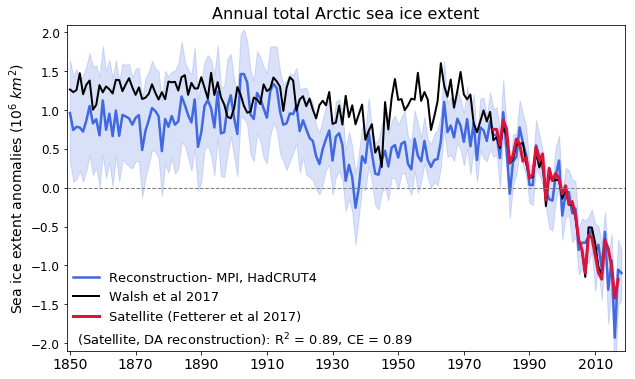

In [17]:
# PLOT ALL CRU RECONSTRUCTIONS WITH BEST INFLATION FACTOR:
inf_loc_mn = 1

plt.figure(figsize=(10,6))
  
plt.plot(recon_years_all[name_dict[0]]['CRU'], sie_full_mean_anom ,
         color= 'royalblue', label='Reconstruction- MPI, HadCRUT4', 
         linewidth=2.5)

plt.plot(walsh_time,walsh_sie_anom, color='k', label='Walsh et al 2017', linewidth=2)
plt.plot(fet_time,fet_sie_anom, color='crimson', label='Satellite (Fetterer et al 2017)', linewidth=3)

plt.fill_between(recon_years_all[name_dict[0]]['CRU'],
                 sie_2_5_full_anom,sie_97_5_full_anom,color='royalblue',alpha=0.2)

title_text = ('Satellite Era (1979-2017) Statistics:')
var_dt_sat = ('(Detrended variance satellite)  = ' + 
                 '{:,.3f}'.format(var_cru_sie_dt['sat']))
trend_sat = ('Observed trend = ' + 
                '{:,.3f}'.format(sat_slope))
corr_dt_plt = ('Detrended R$^{2}$ = ' + 
                          '{:,.2f}'.format(corr_cru_sie_dt[allit]**2))
trend_plt = ('DA trend  = ' + 
             '{:,.3f}'.format(np.nanmean(slope_cru_sie[allit]))+
             ' $\pm$ '+'{:,.3f}'.format(np.std(slope_cru_sie[allit])*2))
corr_plt = ('R$^{2}$ = ' + '{:,.2f}'.format(corr_cru_sie[allit]**2))
ce_plt = ('CE = ' + '{:,.2f}'.format(ce_cru_sie[allit]))
ce_corr_plt = (('(Satellite, DA reconstruction): R$^{2}$ = ' + '{:,.2f}'.format(corr_cru_sie[allit]**2))+
               ', CE = '+'{:,.2f}'.format(ce_cru_sie[allit]))

plt.gcf().text(0.14, 0.14, ce_corr_plt , fontsize=13,color='k')

plt.title('Annual total Arctic sea ice extent', fontsize=16)
plt.ylim(-2.1,2.1)
plt.xlim(1849,2019)

leg = plt.legend(fontsize=13, framealpha=1.0,frameon=False, bbox_to_anchor=(0.47, 0.28))
for t,text in enumerate(leg.get_texts()):
    if t < 4:
        plt.setp(text, color = 'k')
    elif t is 3:
        plt.setp(text, color = 'crimson')
    else: 
        plt.setp(text, color = 'royalblue')
        
plt.axhline(0,color='gray',linestyle='--',linewidth=1)

# plt.xlim(1970,2020)
plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xticks(np.arange(1850,2021,20),fontsize=14)
#plt.xticks(np.arange(1975,2021,5),fontsize=14)
plt.yticks(fontsize=12)

# plt.axvline(1940)
# plt.axvline(1935)
# plt.axvline(1945)
#plt.axvline(1953, linestyle='--', color='c',linewidth=3)

#plt.xlim(1975,2020)

# savedir = '/home/disk/p/mkb22/Documents/graphs/Brennan_etal_2019/'
# savename = 'recon_mpi_hadcrut_1850_2017_walsh_sat4.png'
# plt.savefig(savedir+savename)

In [26]:
sat_loss = fet_sie_anom.max()-fet_sie_anom.min()
etcw_loss = sie_full_mean_anom[np.array(recon_years_all[name_dict[0]]['CRU'])>1900].max() - sie_full_mean_anom[np.array(recon_years_all[name_dict[0]]['CRU'])<1970].min()
walsh_min = walsh_sie_anom[walsh_time<1970].min()

(sat_loss, etcw_loss, sat_loss/etcw_loss, 
 walsh_min-sie_full_mean_anom[np.array(recon_years_all[name_dict[0]]['CRU'])<1970].min())

(2.2916666666666696,
 1.7227022165091541,
 1.3302744053528024,
 0.5258865931508945)

In [177]:
sat_startr = fet_sie_anom[(fet_time<1984)]
sat_endr = fet_sie_anom[(fet_time>2012)]
etcw_startr = sie_full_mean_anom[(np.array(recon_years_all[name_dict[0]]['CRU'])>1910)&(np.array(recon_years_all[name_dict[0]]['CRU'])<1915)] 
etcw_endr = sie_full_mean_anom[(np.array(recon_years_all[name_dict[0]]['CRU'])>1935)&(np.array(recon_years_all[name_dict[0]]['CRU'])<1940)] 

sat_start = (sat_startr.max()+sat_startr.min())/2
sat_end = (sat_endr.max()+sat_endr.min())/2
etcw_start = (etcw_startr.max()+etcw_startr.min())/2
etcw_end = (etcw_endr.max()+etcw_endr.min())/2

In [182]:
sat_start - sat_end, etcw_start - etcw_end, etcw_start, etcw_end

(1.7595833333333344,
 1.0873564342713498,
 1.1607243495970254,
 0.07336791532567571)

In [160]:
sie_full_mean_anom[(np.array(recon_years_all[name_dict[0]]['CRU'])>1930)&(np.array(recon_years_all[name_dict[0]]['CRU'])<1970)].max(),sie_full_mean_anom[np.array(recon_years_all[name_dict[0]]['CRU'])<1970].min()

(1.104394925220486, -0.25854480813597025)

In [129]:
etcw_loss = sie_full_mean_anom.max() - sie_full_mean_anom[np.array(recon_years_all[name_dict[0]]['CRU'])<1970].min(),

In [145]:
print(title_text) 
print(var_dt_sat)
print('Detrended StDev recon = ' + '{:,.3f}'.format(np.sqrt(var_cru_sie_dt[allit])))
print('Detrended StDev sat = ' + '{:,.3f}'.format(np.sqrt(var_cru_sie_dt['sat'])))
print(trend_sat) 
print(trend_plt)
print(corr_dt_plt)
print(corr_plt)
print(ce_plt)
print(ce_corr_plt)

Satellite Era (1979-2017) Statistics:
(Detrended variance satellite)  = 0.046
Detrended StDev recon = 0.279
Detrended StDev sat = 0.214
Observed trend = -0.055
DA trend  = -0.052 $\pm$ 0.012
Detrended R$^{2}$ = 0.43
R$^{2}$ = 0.89
CE = 0.89
(Satellite, DA reconstruction): R$^{2}$ = 0.89, CE = 0.89


In [148]:
var_cru_sie_dt['sat'],var_cru_sie_dt[allit]

(0.04596345382163757, 0.0780752588830403)

In [117]:
da_std_1850_1970  = np.std(sie_full_mean_anom[np.where(np.array(recon_years_all[name_dict[0]]['CRU'])<1971)])
walsh_std_1850_1970 = np.std(walsh_sie_anom[np.where(walsh_time<1971)])

print('Standard Deviation 1850-1970:')
print('DA recon = '+str(np.round(da_std_1850_1970,5)*np.power(10,6)))
print('Walsh = '+str(np.round(walsh_std_1850_1970,5)*np.power(10,6)))

da_std_1850_1970/walsh_std_1850_1970

Standard Deviation 1850-1970:
DA recon = 316560.0
Walsh = 219640.0


1.441261273446432

In [152]:
da_std_1850_1970  = np.std(sie_full_mean_anom[np.where(np.array(recon_years_all[name_dict[0]]['CRU'])<1979)])
walsh_std_1850_1970 = np.std(walsh_sie_anom[np.where(walsh_time<1979)])

print('Standard Deviation 1850-1970:')
print('DA recon = '+str(np.round(da_std_1850_1970,5)*np.power(10,6)))
print('Walsh = '+str(np.round(walsh_std_1850_1970,5)*np.power(10,6)))
da_std_1850_1970/walsh_std_1850_1970, (da_std_1850_1970-walsh_std_1850_1970)*np.power(10,6)

Standard Deviation 1850-1970:
DA recon = 309750.0
Walsh = 222070.0


(1.3948456661478628, 87682.41879229811)

In [167]:
np.round(da_std_1850_1970,5)*np.power(10,6) - np.round(walsh_std_1850_1970,5)*np.power(10,6)

87680.0

In [52]:
#Confidence interval for trend: 

SE = np.std(slope_cru_sie[allit])/np.sqrt(999)
t = 1.962
SE*t

0.0003869507479035757